## Regression and Classification

[link](https://ut.philkr.net/deeplearning/first_example/regression_and_classification/)

In [2]:
import torch
import torch.nn as nn

In [ ]:
model = nn.Linear(10, 1)

In [12]:
print(model)

Linear(in_features=10, out_features=1, bias=True)


In [13]:
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.1814,  0.2942,  0.3043,  0.1343, -0.1489,  0.0362, -0.2569, -0.0141,
          0.2144, -0.1356]], requires_grad=True)
Parameter containing:
tensor([0.0791], requires_grad=True)


In [15]:
x = torch.ones(10)
model(x)

tensor([0.6883], grad_fn=<ViewBackward0>)

### Linear Binary Classifier

In [26]:
class LinearClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        x = self.linear(x)
        px = nn.functional.sigmoid(x) # sigmoid never should go inside the model (numerical issues)
        return px

In [27]:
model = LinearClassifier(10)
model(x)

tensor([0.5413], grad_fn=<SigmoidBackward0>)

In [28]:
model.linear.weight

Parameter containing:
tensor([[ 0.2311, -0.1437,  0.1456, -0.0337, -0.0331, -0.2462,  0.1643,  0.2283,
          0.1793, -0.0950]], requires_grad=True)

### Linear multiclass classifier

In [33]:
class LinearClassifier(nn.Module):
    def __init__(self, input_dim, n_classes):
        super().__init__()
        self.linear = nn.Linear(input_dim, n_classes)

    def forward(self, x):
        x = self.linear(x)
        px = nn.functional.softmax(x,dim=-1) # softmax should never go inside the model (numerical issues)
        return px

In [36]:
model = LinearClassifier(10, 4)
x = torch.ones(20,10)
model(x).sum(dim=-1)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], grad_fn=<SumBackward1>)

### Multiple Binary Classification
For no mutually exclussive classifcation

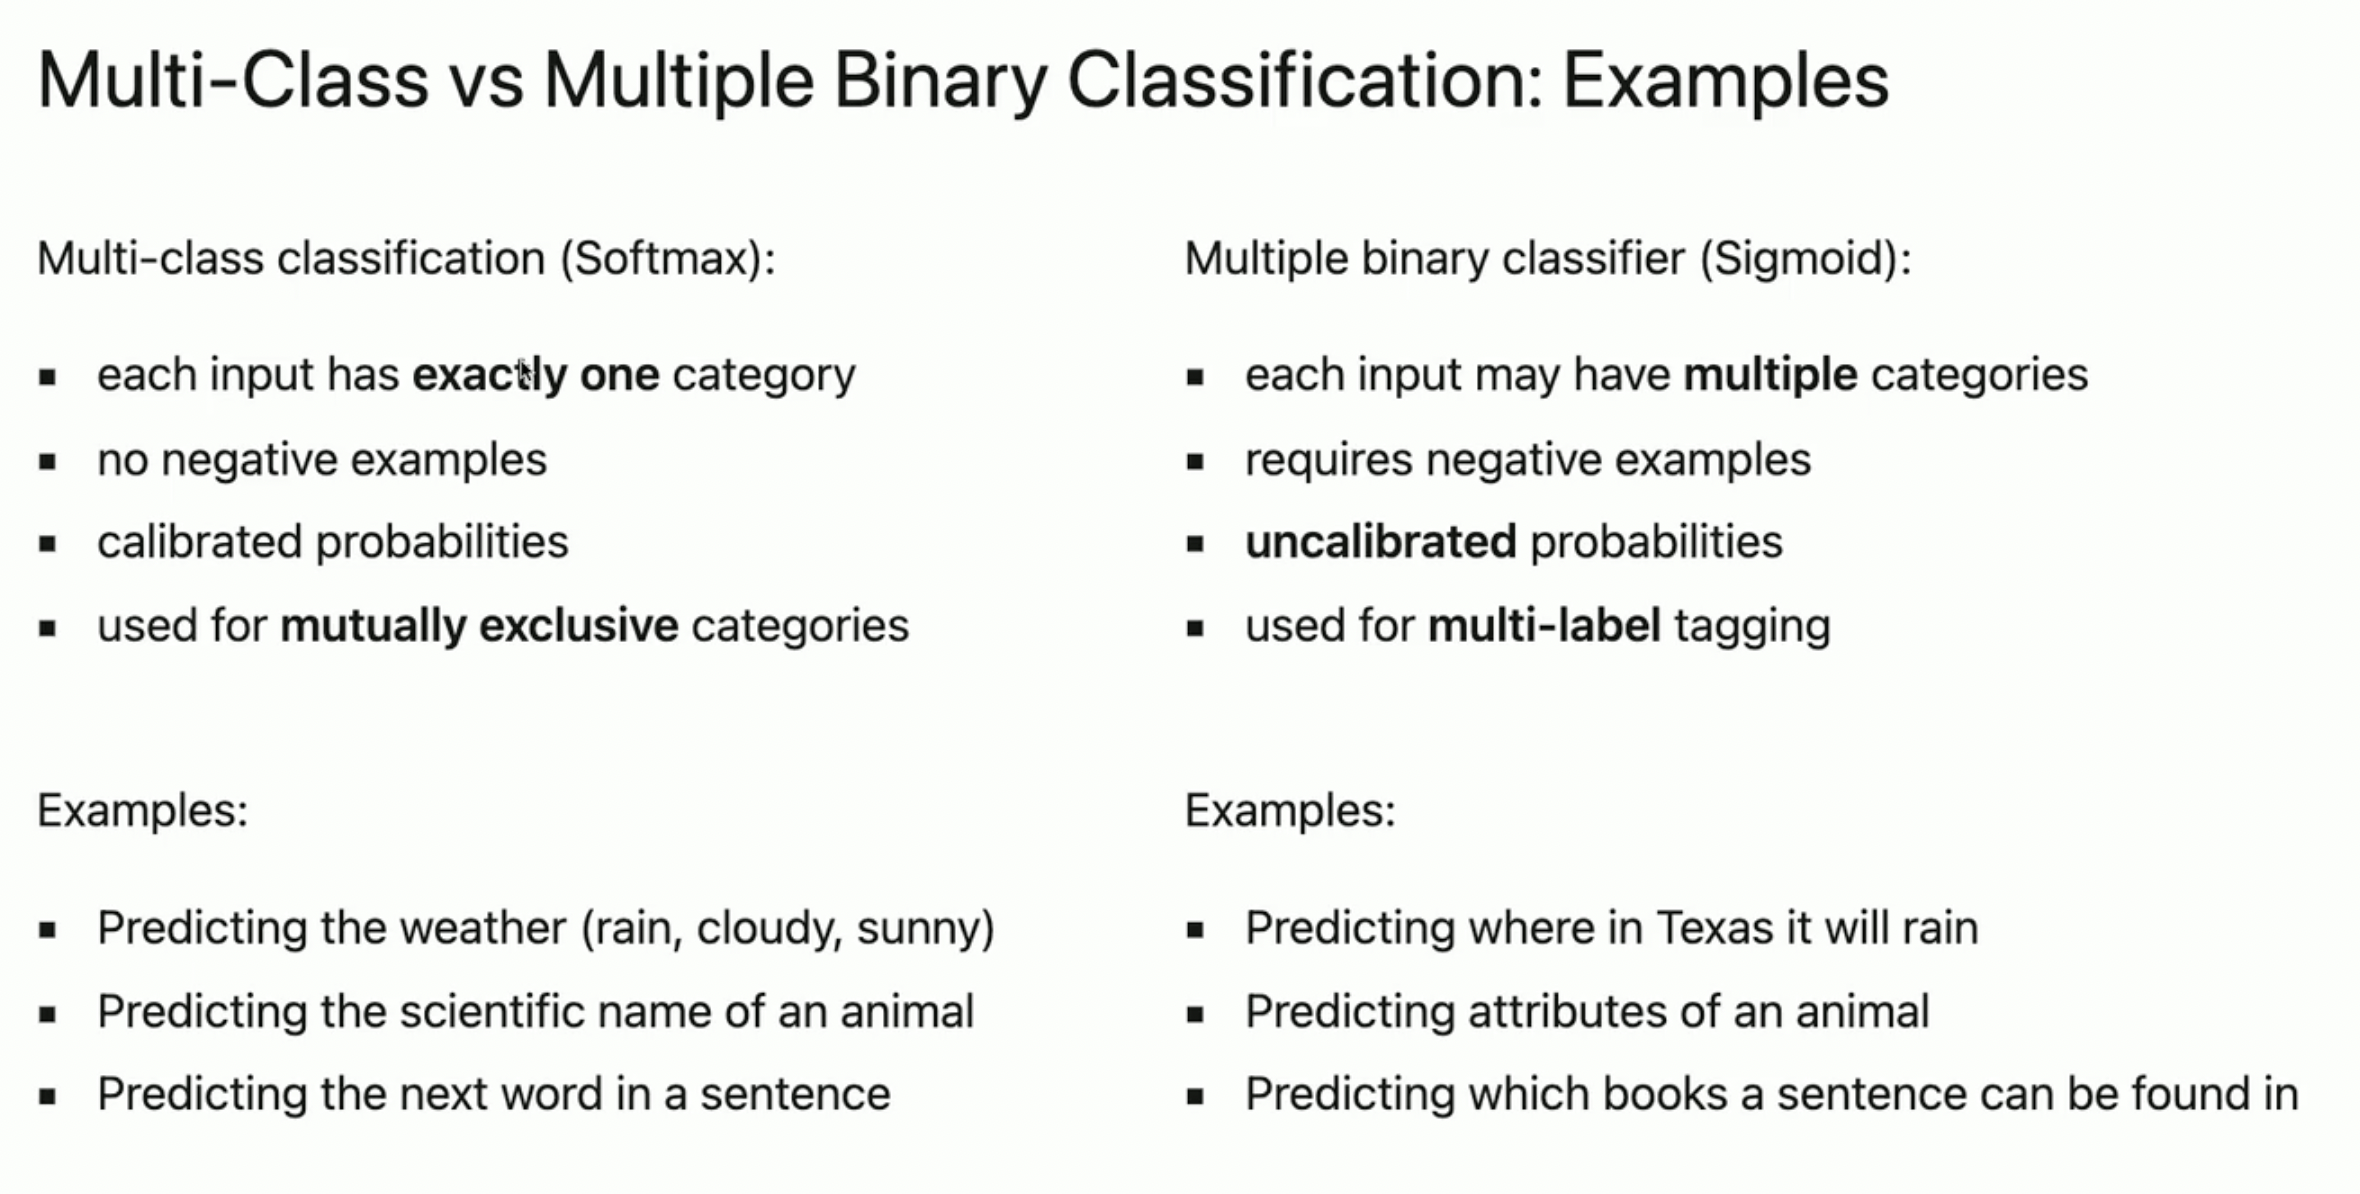

In [39]:
class LinearClassifier(nn.Module):
    def __init__(self, input_dim, n_classes):
        super().__init__()
        self.linear = nn.Linear(input_dim, n_classes)

    def forward(self, x):
        x = self.linear(x)
        px = nn.functional.sigmoid(x) # sigmoid should never go inside the model (numerical issues)
        return px

In [40]:
model = LinearClassifier(10, 4)
x = torch.ones(20,10)
model(x).sum(dim=-1)

tensor([1.9712, 1.9712, 1.9712, 1.9712, 1.9712, 1.9712, 1.9712, 1.9712, 1.9712,
        1.9712, 1.9712, 1.9712, 1.9712, 1.9712, 1.9712, 1.9712, 1.9712, 1.9712,
        1.9712, 1.9712], grad_fn=<SumBackward1>)